<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Lewandowski/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing data, zakończone analizą PCA

In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("train.csv")
df.tail()

<ipython-input-136-9cd020bc610d>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [137]:
df.shape

(100000, 28)

In [138]:
duplicates = df.duplicated(subset=['ID'])
if duplicates.any():
    print("Znaleziono duplikaty w kolumnie 'ID'.")
    print(df[duplicates])
else:
    print("Brak duplikatów w kolumnie 'ID'.")

Brak duplikatów w kolumnie 'ID'.


In [139]:
df.drop_duplicates(subset="ID", inplace=True)

In [140]:
df['Age'] = df['Age'].str.replace('_','')

In [141]:
types_data = {
    "ID": str,
    "Customer_ID": str,
    "Month": str,
    "Name": str,
    "Age": int,
}

df.astype(types_data)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [142]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(method='pad')

In [143]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')

In [144]:
df['Age'] = df['Age'].str.replace('-','')

In [145]:
df["ID"] = df["ID"].astype(str)
df["Customer_ID"] = df["Customer_ID"].astype(str)
df["Month"] = df["Month"].astype(str)
df["Name"] = df["Name"].astype(str)
df["Age"] = df["Age"].astype(int)
df["Annual_Income"] = df["Annual_Income"].astype(float)
df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].astype(float)

In [146]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [147]:
df["ID"]=df["ID"].fillna('Brak informacji')
df['Customer_ID'] = df['Customer_ID'].fillna('Brak informacji')
df['Month'] = df['Month'].fillna('Brak informacji')
df['Name'] = df['Name'].fillna('Nieznane')

In [148]:
df = df.drop(df[df['Age'] > 100].index)

In [149]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(method='pad')

In [150]:
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].astype(int)

In [151]:
FeaturesToConvert = ['Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for feature in FeaturesToConvert:
  df[feature] = df[feature].str.replace('_','')

In [152]:
# Zamiana na typ danych typu float
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)
df["Credit_Utilization_Ratio"] = df["Credit_Utilization_Ratio"].astype(float)
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)
df = df.dropna(subset=["Changed_Credit_Limit"])
df = df[df["Changed_Credit_Limit"] != '']
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)

In [153]:
# Zastępowanie wartości pustych
df["SSN"]=df["SSN"].fillna('Brak informacji')
df["SSN"] = df["SSN"].astype(str)
df["Occupation"]=df["Occupation"].fillna('Brak informacji')
df["Occupation"] = df["Occupation"].str.replace('_______','Brak informacji')
df["Occupation"] = df["Occupation"].astype(str)
df['Annual_Income'] = df['Annual_Income'].fillna(method='pad')
df["Annual_Income"] = df["Annual_Income"].astype(float)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(0)
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].astype(float)
df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(0)
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(float)
df['Interest_Rate'] = df['Interest_Rate'].fillna(0)
df['Interest_Rate'] = df['Interest_Rate'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(0)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Nieokreślony')
df["Type_of_Loan"] = df["Type_of_Loan"].astype(str)
df['Delay_from_due_date'] = df['Delay_from_due_date'].fillna(0)
df["Delay_from_due_date"] = df["Delay_from_due_date"].astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(0)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)
df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].astype(float)
df['Credit_Mix'] = df['Credit_Mix'].fillna('Nieznane')
df["Credit_Mix"] = df["Credit_Mix"].astype(str)
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(0)
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].fillna(0)
df["Credit_Utilization_Ratio"] = df["Credit_Utilization_Ratio"].astype(float)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna('Brak informacji')
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].astype(str)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].fillna(method='pad')
df["Total_EMI_per_month"] = df["Total_EMI_per_month"].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(method='pad')
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna('Brak informacji')
df["Payment_Behaviour"] = df["Payment_Behaviour"].astype(str)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(method='pad')
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)
df['Credit_Score'] = df['Credit_Score'].fillna('Brak informacji')
df["Credit_Score"] = df["Credit_Score"].astype(str)

In [154]:
# Funkcja, w której zamieniamy tekst na wartości liczbowe w latach
def convert_to_years(text):
    if isinstance(text, str):
        parts = text.split()
        year = int(parts[0])
        month = int(parts[3])

        credit_age_numeric = year + month / 12
        return credit_age_numeric
    else:
        return text
df["Credit_History_Age"] = df["Credit_History_Age"].apply(lambda x: convert_to_years(x))

In [155]:
# Zamiana wartości pustych w Credit_History_Age na 0
df["Credit_History_Age"] = df["Credit_History_Age"].fillna(0)
# Zamiana kolumny Credit_History_Age na typ danych zmiennoprzecinkowych
df["Credit_History_Age"] = df["Credit_History_Age"].astype(float)
df.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22.083333,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,0.000000,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22.333333,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22.416667,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22.500000,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,22.583333,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,nan,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,0.000000,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Brak informacji,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,26.583333,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,26.666667,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,_,605.03,33.224951,26.750000,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


In [156]:
# Wybranie kolumn, w których nie mogą być wartości ujemne
non_negative_values = ['Num_Bank_Accounts', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']
# Usuwanie ujemnych wartości
for column in non_negative_values:
  df = df.drop(df[df[column] < 0].index)
# Sprawdzamy czy ujemne wartości zostały usunięte w sposób prawidłowy
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,88911.000000,8.891100e+04,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,88911.000000,8.891100e+04
mean,33.233953,1.757437e+05,4166.989894,17.161049,22.586395,72.578567,7.134427,21.350294,28.995929,10.656559,27.155875,1441.252884,32.273705,16.650178,1412.188441,632.641769,-3.374161e+22
std,10.759439,1.429543e+06,3167.993440,117.198975,129.245673,467.955866,59.870235,14.798526,217.753292,6.657743,190.473469,1162.682635,5.112085,9.509510,8325.519519,2034.485118,3.353534e+24
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.932340e+04,1619.204167,4.000000,4.000000,8.000000,2.000000,10.000000,8.000000,5.620000,3.000000,573.650000,28.048837,9.416667,30.622965,74.197214,2.662491e+02
50%,33.000000,3.724022e+04,3074.173535,6.000000,6.000000,14.000000,3.000000,18.000000,13.000000,9.580000,6.000000,1176.390000,32.293626,17.250000,69.421937,135.129220,3.327215e+02
75%,42.000000,7.225236e+04,5917.086667,8.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.100000,9.000000,1974.635000,36.489297,24.166667,161.844011,264.213741,4.641813e+02
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,33.666667,82331.000000,10000.000000,1.602041e+03


In [157]:
# Wartości odstające dla dochodu rocznego
Aq1 = df.Annual_Income.quantile(0.25)
Aq3 = df.Annual_Income.quantile(0.75)
Aiqr = Aq3 - Aq1

# Wartości odstające dla Num_Bank_Accounts
Nq1 = df.Num_Bank_Accounts.quantile(0.25)
Nq3 = df.Num_Bank_Accounts.quantile(0.75)
Niqr = Nq3 - Nq1

# Wartości odstające dla Num_Credit_Card
NCq1 = df.Num_Credit_Card.quantile(0.25)
NCq3 = df.Num_Credit_Card.quantile(0.75)
NCiqr = NCq3 - NCq1

# Total_EMI_per_month
Tq1 = df.Total_EMI_per_month.quantile(0.25)
Tq3 = df.Total_EMI_per_month.quantile(0.75)
Tiqr = Tq3 - Tq1

# Wartości odstające dla Interest_Rate
INq1 = df.Interest_Rate.quantile(0.25)
INq3 = df.Interest_Rate.quantile(0.75)
INiqr = INq3 - INq1

# Wartości odstające dla Num_of_Loan
NLq1 = df.Num_of_Loan.quantile(0.25)
NLq3 = df.Num_of_Loan.quantile(0.75)
NLiqr = NLq3 - NLq1

# Wartości odstające dla Num_of_Delayed_Payment
NPq1 = df.Num_of_Delayed_Payment.quantile(0.25)
NPq3 = df.Num_of_Delayed_Payment.quantile(0.75)
NPiqr = NPq3 - NPq1

# Usuwanie wartości odstających
df = df.drop(df.loc[df['Annual_Income'] > (Aq3 + 1.5 * Aiqr)].index)
df = df.drop(df.loc[df['Annual_Income'] < (Aq1 - 1.5 * Aiqr)].index)

df = df.drop(df.loc[df['Num_Bank_Accounts'] > (Nq3 + 1.5 * Niqr)].index)
df = df.drop(df.loc[df['Num_Bank_Accounts'] < (Nq1 - 1.5 * Niqr)].index)

df = df.drop(df.loc[df['Num_Credit_Card'] > (NCq3 + 1.5 * NCiqr)].index)
df = df.drop(df.loc[df['Num_Credit_Card'] < (NCq1 - 1.5 * NCiqr)].index)

df = df.drop(df.loc[df['Total_EMI_per_month'] > (Tq3 + 1.5 * Tiqr)].index)
df = df.drop(df.loc[df['Total_EMI_per_month'] < (Tq1 - 1.5 * Tiqr)].index)

df = df.drop(df.loc[df['Interest_Rate'] > (INq3 + 1.5 * INiqr)].index)
df = df.drop(df.loc[df['Interest_Rate'] < (INq1 - 1.5 * INiqr)].index)

df = df.drop(df.loc[df['Num_of_Loan'] > (NLq3 + 1.5 * NLiqr)].index)
df = df.drop(df.loc[df['Num_of_Loan'] < (NLq1 - 1.5 * NLiqr)].index)

df = df.drop(df.loc[df['Num_of_Delayed_Payment'] > (NPq3 + 1.5 * NPiqr)].index)
df = df.drop(df.loc[df['Num_of_Delayed_Payment'] < (NPq1 - 1.5 * NPiqr)].index)

df.shape

(75421, 28)

In [158]:
# Utworzenie obiektu encodera
le = LabelEncoder()

# Zamiana wartości Credit Score na liczbowe, dzięki labelencodera
df.Credit_Score = le.fit_transform(df.Credit_Score)

# Sprawdzenie czy wszystko się zakodowało poprawnie

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Good': 0, 'Poor': 1, 'Standard': 2}


In [159]:
from sklearn.preprocessing import MinMaxScaler

# Utworzenie instancji scaler'a
scaler = MinMaxScaler()

col_float = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance', 'Credit_Score']

for i in col_float:
    df[i] = scaler.fit_transform(df[[i]])

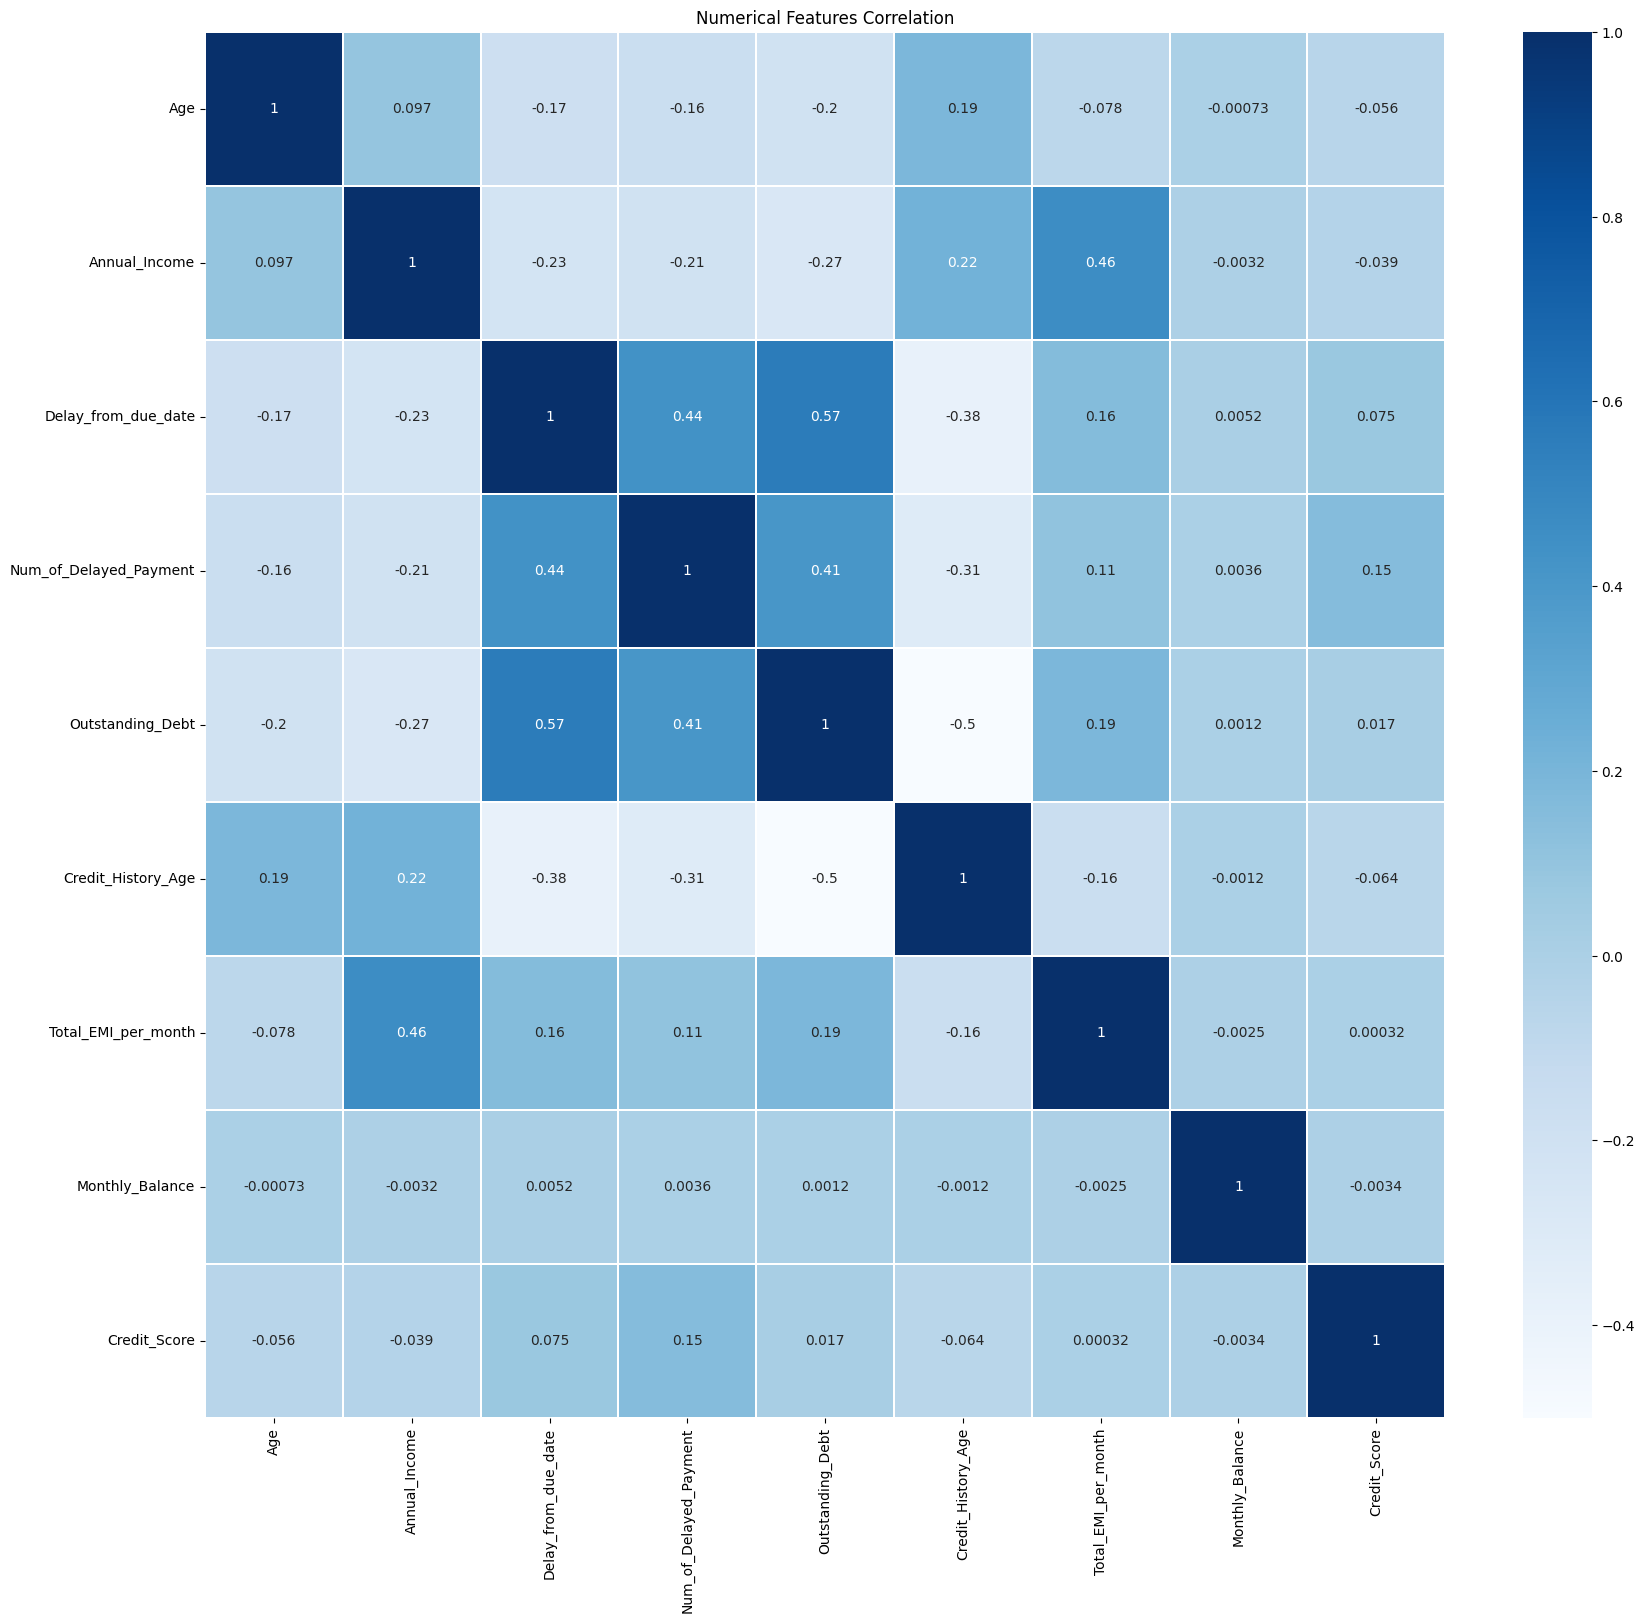

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wybranie kolumn numerycznych
numerical_cols = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment','Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance', 'Credit_Score']

# Rysowanie heatmapy korelacji między wybranymi cechami numerycznymi
plt.figure(figsize=(20, 18))
sns.heatmap(df[numerical_cols].corr(), annot=True, linewidths=0.1, cmap='Blues')
plt.title('Numerical Features Correlation')
plt.show()

<ipython-input-161-7a3e4954764a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_credit_score = pd.DataFrame(abs(df.corr()['Credit_Score'].drop('Credit_Score') * 100).sort_values(ascending=False))


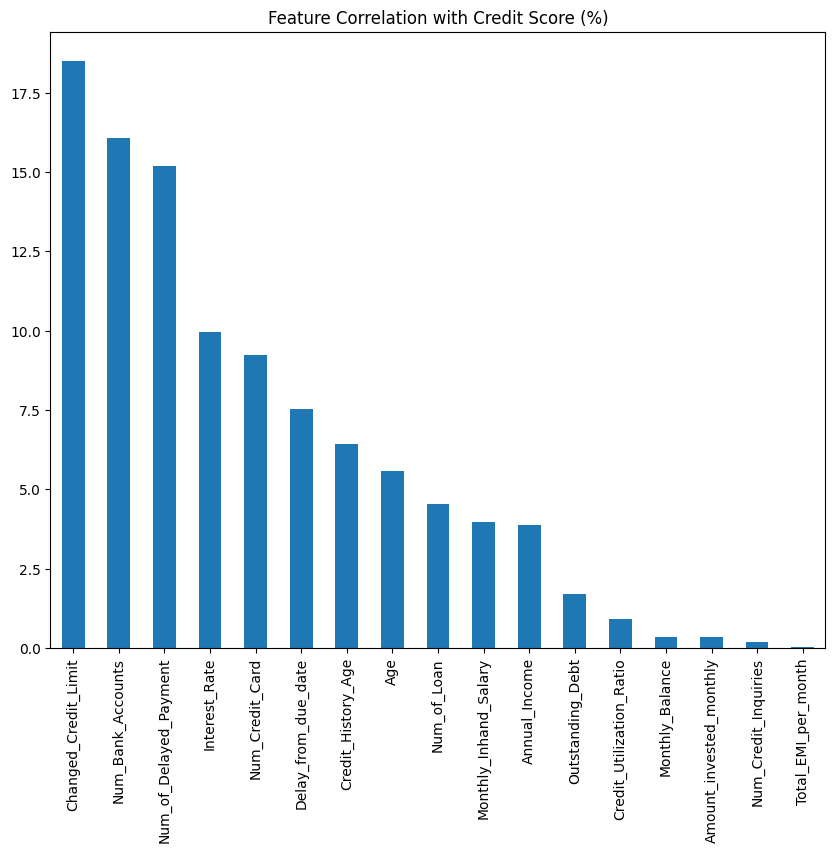

In [161]:
# Utworzenie DataFrame z rankingiem korelacji cech względem 'Credit_Score_Encoded'
correlation_with_credit_score = pd.DataFrame(abs(df.corr()['Credit_Score'].drop('Credit_Score') * 100).sort_values(ascending=False))

# Wyświetlenie rankingu korelacji w formie wykresu słupkowego
correlation_with_credit_score.plot.bar(figsize=(10, 8), legend=False)
plt.title('Feature Correlation with Credit Score (%)')
plt.show()

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Przeprowadzenie analizy PCA dla Num_Bank_Accounts i Num_Credit_Card
selected_columns = ['Num_Bank_Accounts', 'Num_Credit_Card']

# Standaryzacja danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_columns])

# PCA
pca = PCA(n_components=2)  # Określ liczbę głównych składowych
principal_components = pca.fit_transform(scaled_data)

# Utworzenie ramki danych dla głównych składowych
principal_df = pd.DataFrame(data=principal_components,
                            columns=['Principal Component 1', 'Principal Component 2'])

# Wyświetlenie wyników
print(principal_df.head())

   Principal Component 1  Principal Component 2
0              -1.221929               0.140374
1              -1.221929               0.140374
2              -1.221929               0.140374
3              -1.221929               0.140374
4              -1.221929               0.140374
